In [119]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import axis, imshow, subplot, show, title
from scipy.signal import gaussian, convolve2d
from skimage.io import imread, imsave
from skimage.util import img_as_float

font = {'fontname': 'Times New Roman'}

#1.1 Writing a gamma transformation
def gamma_transform(image, gamma, c = 1):
    image = img_as_float(image)
    return c * image ** gamma

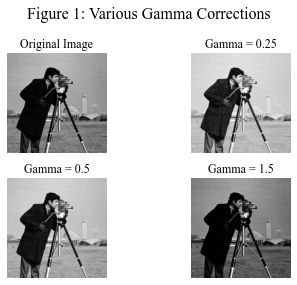

In [2]:
#testing the gamma transform:
I = imread('cameraman.tif', as_gray = True)

I2 = gamma_transform(I, 0.25)
I3 = gamma_transform(I, 0.5)
I4 = gamma_transform(I, 1.5)

fig = plt.figure()
fig.suptitle('Figure 1: Various Gamma Corrections', fontsize = 16, **font)

subplot(2,2,1)
imshow(I, cmap = 'gray')
title('Original Image', **font)
axis('off')

subplot(2,2,2)
imshow(I2, cmap = 'gray')
title('Gamma = 0.25', **font)
axis('off')

fig.add_subplot(2,2,3)
imshow(I3, cmap = 'gray')
title('Gamma = 0.5', **font)
axis('off')

fig.add_subplot(2,2,4)
imshow(I4, cmap = 'gray')
title('Gamma = 1.5', **font)
axis('off')

fig.tight_layout()
plt.show()

fig.savefig('Figure1.jpg', dpi=1200)

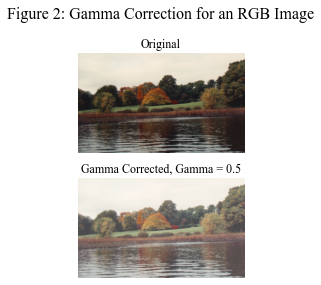

In [17]:
A = imread('autumn.tif')

def rgb_gamma(image, gamma):
    B = np.zeros(A.shape)
    for i in range(3):
         B[:,:,i] = gamma_transform(A[:,:,i], gamma)
    return B

B = rgb_gamma(A, 0.5)

fig = plt.figure()
fig.suptitle('Figure 2: Gamma Correction for an RGB Image', fontsize = 16, **font)

subplot(211)
imshow(A)
title('Original', **font)
axis('off')

subplot(212)
imshow(B)
title('Gamma Corrected, Gamma = 0.5', **font)
axis('off')

fig.tight_layout()
show()

fig.savefig('Figure2.jpg', dpi=1200)

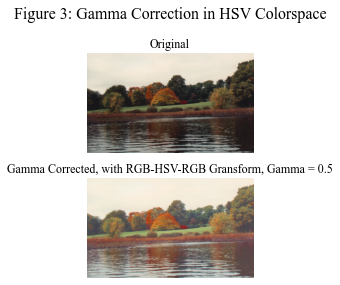

In [18]:
#Excerise 1.3
from skimage.color import rgb2hsv, hsv2rgb

A = imread('autumn.tif')

A_hsv = rgb2hsv(A)
A_hsv[:,:,2] = gamma_transform(A_hsv[:,:,2], 0.5)
A_rgb = hsv2rgb(A_hsv)

fig = plt.figure()
fig.suptitle('Figure 3: Gamma Correction in HSV Colorspace', fontsize = 16, **font)

subplot(211)
imshow(A)
title('Original', **font)
axis('off')

subplot(212)
imshow(A_rgb)
title('Gamma Corrected, with RGB-HSV-RGB Gransform, Gamma = 0.5', **font)
axis('off')

fig.tight_layout()
show()

fig.savefig('Figure3.jpg', dpi=1200)

Assignment 1.4

In [120]:
#function for Gaussian noise, using the mean and std grayscale values
def add_gaussian_noise(image):
    image = img_as_float(image)
    noise = np.random.normal(np.mean(image), np.std(image), image.shape)
    return image + noise   

def f_sigma(x, y, sigma):
    return np.exp(-(x**2 + y**2)/(2 * sigma**2))

def g_tau(u, tau):
    return np.exp(-(u**2)/(2 * tau**2))

def gauss_kernel_1d(sigma, N = None):
    if N == None:
        N = 3 * sigma
    N = int(np.floor(N))
    return gaussian(N, sigma)

def gauss_kernel_2d(sigma, N = None):
    if N == None:
        N = 3 * sigma
    N = int(np.floor(N))
    gauss1, gauss2 = gaussian(N, sigma), gaussian(N, sigma)
    return np.outer(gauss1, gauss2)

Text(0.5, 1.0, 'Gauss filter, sigma = 2')

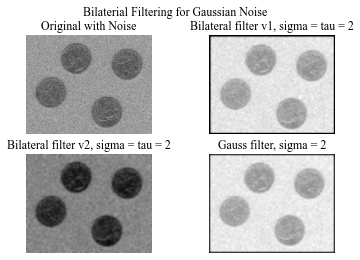

In [139]:
#loading the image and adding Gaussian noise
I = imread('eight.tif')
I = add_gaussian_noise(I)

#plotting all the kinds of transformations
fig = plt.figure()
fig.suptitle('Bilaterial Filtering for Gaussian Noise', ** font)

subplot(221)
imshow(I, cmap = 'gray')
axis('off')
title('Original with Noise', ** font)

B = bilateral_filter(A, 2, 2)

subplot(222)
imshow(B,cmap = 'gray')
axis('off')
title('Bilateral filter v1, sigma = tau = 2', **font)

C = bilateral_filter2(A, 2, 2)

subplot(223)
imshow(C,cmap = 'gray')
axis('off')
title('Bilateral filter v2, sigma = tau = 2', **font)

D = convolve2d(A, gauss_kernel_2d(2))

subplot(224)
imshow(D,cmap = 'gray')
axis('off')
title('Gauss filter, sigma = 2', **font)

In [131]:
def f_sigma(x, y, sigma):
    return np.exp(-(x**2 + y**2)/(2 * sigma**2))

def g_tau(u, tau):
    return np.exp(-(u**2)/(2 * tau**2))

def apply_gaussian(arr, std):
    return np.exp(-(arr**2)/(2 * std**2))


def bilateral_filter(I, sigma, tau, N = None):
    if N == None:
        N = 3 * sigma
    rows, cols = I.shape
    
    delta = lambda x : 0 if x % 2 != 0 else 1
    size = int(np.ceil(N / 2))
    
    filtered_I = np.zeros(I.shape)
    I = np.pad(I, size)

    for y in range(size, cols - size):
        for x in range(size, rows - size):
            
            I_loc = I[x - size:x + size - 1, y - size:y + size - 1]
            photometric_kernel = apply_gaussian(I_loc - I_loc[size, size], tau)
            spatial_kernel = gauss_kernel_2d(sigma, N - delta(N))
            
            omega_ij = np.multiply(spatial_kernel, photometric_kernel)
            prod = np.multiply(omega_ij, I_loc)
            
            filtered_I[x, y] = np.sum(prod) / np.sum(omega_ij)
            
    return filtered_I             

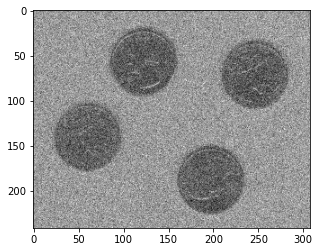

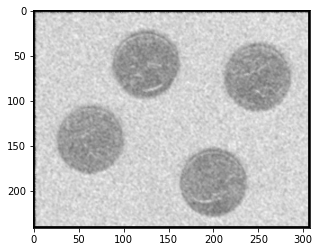

In [132]:
A = imread('eight.tif')
A = add_gaussian_noise(A)
imshow(A, cmap = 'gray')
show()

B = bilateral_filter(A, 1, 1)

imshow(B,cmap = 'gray')
show()

In [149]:
def apply_gaussian(arr, std):
    return np.exp(-(arr**2)/(2 * std**2))

def mat_slice(arr, x, y, radius):
    for i in range(0, radius + 1):
        if x - i >= 0 and y - i >= 0 and x + i < arr.shape[0] and y + i < arr.shape[1]:
            arr_slice = arr[x - i:x + i + 1, y - i:y + i + 1]
    return arr_slice

def add_gaussian_noise(image):
    image = img_as_float(image)
    noise = np.random.normal(np.mean(image), np.std(image), image.shape)
    return image + noise  

def gauss_kernel_2d(sigma, N = None):
    if N == None:
        N = 3 * sigma
    N = int(np.floor(N))
    gauss1, gauss2 = gaussian(N, sigma), gaussian(N, sigma)
    return np.outer(gauss1, gauss2)

def bilateral_filter2(I, sigma, tau, N = None):
    if N == None:
        N = 3 * sigma
    rows, cols = I.shape
    
    size = int(np.ceil(N / 2))

    filtered_I = np.zeros(I.shape)
    
    for y in range(cols):
        for x in range(rows):
            I_loc = mat_slice(I, x, y, size)
            
            photometric_kernel = apply_gaussian(I_loc - I_loc[I_loc.shape[0] // 2, I_loc.shape[1] // 2], tau)
            spatial_kernel = gauss_kernel_2d(sigma, I_loc.shape[0])
            
            omega_ij = np.multiply(spatial_kernel, photometric_kernel)
            prod = np.multiply(omega_ij, I_loc)
            
            filtered_I[x, y] = np.sum(prod) / np.sum(omega_ij)

    return filtered_I 